#imp

In [ ]:
import pandas as pd
pd.set_option("max_colwidth", 160)
pd.set_option("display.max_columns", None)

import numpy as np
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.style.use("seaborn-talk")



def load_data(file_path, indx = True, indx_col = 0):
  '''Parameters:
  file_path: path to your excel or csv file with data,

  indx: boolean - whether there is index column in your file (usually it is the first column) --> *by default it is set to True
  
  indx_col: int - if your file has an index column, specify column number here --> *by default it is equal to 0 (first column)
  '''
  if indx == True and file_path.endswith(".xlsx"):
    data = pd.read_excel(file_path, index_col = indx_col)
  elif indx == False and file_path.endswith(".xlsx"):
    data = pd.read_excel(file_path)

  elif indx == True and file_path.endswith(".csv"):
    data = pd.read_csv(file_path, index_col = indx_col)
  elif indx == False and file_path.endswith(".csv"):
    data = pd.read_csv(file_path)
  return data


#load data

In [ ]:
import io
from google.colab import files

uploaded = files.upload()

Saving Zbiór_AMU_Barbara_Konat_v2.sav to Zbiór_AMU_Barbara_Konat_v2.sav


In [ ]:
!pip install pyreadstat

In [ ]:
df = pd.read_spss('/content/Zbiór_AMU_Barbara_Konat_v2.sav')
df.shape

(958, 42)

In [ ]:
import pyreadstat

df2, meta = pyreadstat.read_sav('/content/Zbiór_AMU_Barbara_Konat_v2.sav')

In [ ]:
meta

In [ ]:
type(meta)

pyreadstat._readstat_parser.metadata_container

In [ ]:
meta.column_names_to_labels

{'ID': 'Numer ankiety',
 'survey_finish_time': 'Czas trwania ankiety w sekundach',
 'sex': 'Jaka jest Twoja płeć?',
 'sex_r3_input': 'Jaka jest Twoja płeć? - Identyfikuję się w inny sposób, jak?',
 'sex2': 'W jakiej formie wolisz mieć zadawane pytania w tej ankiecie?',
 'age': 'W jakim jesteś wieku?',
 'year': 'Ile dokładnie masz lat?',
 'miasta': 'W jakiej miejscowości mieszkasz?',
 'wyksztalcenie': 'Jakie jest Twoje wykształcenie?',
 'narodowosc': 'Zaznacz swoją narodowość:',
 'grupa': 'Grupa',
 'p3': 'Czy zaprezentowany polityk jest Ci znany?',
 'p4_r1': 'W jakim stopniu zgadzasz się z poglądami {wylosowanego polityka}?',
 'p5_r1': 'Pomiar 1: Profesjonalna - Amatorska',
 'p5_r2': 'Pomiar 1: Otwarta na świat - Prowincjonalna',
 'p5_r3': 'Pomiar 1: Nieuczciwa - Uczciwa',
 'p5_r4': 'Pomiar 1: Wiarygodna - Niewiarygodna',
 'p5_r5': 'Pomiar 1: Skuteczna - Nieskuteczna',
 'p5_r6': 'Pomiar 1: Atrakcyjna - Nieatrakcyjna',
 'p5_r7': 'Pomiar 1: Niepoważna - Poważna',
 'p5_r8': 'Pomiar 1: Spok

In [ ]:
meta.variable_value_labels

{'sex': {1.0: 'Kobieta',
  2.0: 'Mężczyzna',
  3.0: 'Identyfikuję się w inny sposób (jak?)',
  4.0: 'Nie chcę odpowiadać'},
 'sex2': {1.0: 'Żeńskiej', 2.0: 'Męskiej', 99.0: 'uzasadniony brak danych'},
 'age': {1.0: '15-17 lat',
  2.0: '18-24 lata',
  3.0: '25-34 lata',
  4.0: '35-44 lata',
  5.0: '45-54 lata',
  6.0: '55 lat lub więcej'},
 'miasta': {1.0: 'wieś',
  2.0: 'małe miasto (do 20 tys. mieszkańców)',
  3.0: 'średnie miasto (od 20 do 99 tys. mieszkańców)',
  4.0: 'duże miasto (od 100 do 500 tys. mieszkańców)',
  5.0: 'wielkie miasto (powyżej 500 tys. mieszkańców)'},
 'wyksztalcenie': {1.0: 'Podstawowe',
  2.0: 'Zawodowe',
  3.0: 'Średnie (w tym: studiuję)',
  4.0: 'Wyższe'},
 'narodowosc': {1.0: 'polska', 2.0: 'ukraińska', 3.0: 'inna'},
 'grupa': {1.0: 'Krzysztof Bosak - negatywny',
  2.0: 'Krzysztof Bosak - neutralny',
  3.0: 'Krzysztof Bosak - pozytywny',
  4.0: 'Robert Biedroń - negatywny',
  5.0: 'Robert Biedroń - neutralny',
  6.0: 'Robert Biedroń - pozytywny',
  7.0: 'Raf

In [ ]:
print(meta.column_names_to_labels)


{'ID': 'Numer ankiety', 'survey_finish_time': 'Czas trwania ankiety w sekundach', 'sex': 'Jaka jest Twoja płeć?', 'sex_r3_input': 'Jaka jest Twoja płeć? - Identyfikuję się w inny sposób, jak?', 'sex2': 'W jakiej formie wolisz mieć zadawane pytania w tej ankiecie?', 'age': 'W jakim jesteś wieku?', 'year': 'Ile dokładnie masz lat?', 'miasta': 'W jakiej miejscowości mieszkasz?', 'wyksztalcenie': 'Jakie jest Twoje wykształcenie?', 'narodowosc': 'Zaznacz swoją narodowość:', 'grupa': 'Grupa', 'p3': 'Czy zaprezentowany polityk jest Ci znany?', 'p4_r1': 'W jakim stopniu zgadzasz się z poglądami {wylosowanego polityka}?', 'p5_r1': 'Pomiar 1: Profesjonalna - Amatorska', 'p5_r2': 'Pomiar 1: Otwarta na świat - Prowincjonalna', 'p5_r3': 'Pomiar 1: Nieuczciwa - Uczciwa', 'p5_r4': 'Pomiar 1: Wiarygodna - Niewiarygodna', 'p5_r5': 'Pomiar 1: Skuteczna - Nieskuteczna', 'p5_r6': 'Pomiar 1: Atrakcyjna - Nieatrakcyjna', 'p5_r7': 'Pomiar 1: Niepoważna - Poważna', 'p5_r8': 'Pomiar 1: Spokojna - Wybuchowa', '

In [ ]:
pd.DataFrame(meta.variable_value_labels, ).reset_index()#.to_excel('/content/drive/MyDrive/temp_ex2.xlsx') # index = [1,] 

In [ ]:
print(meta.variable_value_labels)


{'sex': {1.0: 'Kobieta', 2.0: 'Mężczyzna', 3.0: 'Identyfikuję się w inny sposób (jak?)', 4.0: 'Nie chcę odpowiadać'}, 'sex2': {1.0: 'Żeńskiej', 2.0: 'Męskiej', 99.0: 'uzasadniony brak danych'}, 'age': {1.0: '15-17 lat', 2.0: '18-24 lata', 3.0: '25-34 lata', 4.0: '35-44 lata', 5.0: '45-54 lata', 6.0: '55 lat lub więcej'}, 'miasta': {1.0: 'wieś', 2.0: 'małe miasto (do 20 tys. mieszkańców)', 3.0: 'średnie miasto (od 20 do 99 tys. mieszkańców)', 4.0: 'duże miasto (od 100 do 500 tys. mieszkańców)', 5.0: 'wielkie miasto (powyżej 500 tys. mieszkańców)'}, 'wyksztalcenie': {1.0: 'Podstawowe', 2.0: 'Zawodowe', 3.0: 'Średnie (w tym: studiuję)', 4.0: 'Wyższe'}, 'narodowosc': {1.0: 'polska', 2.0: 'ukraińska', 3.0: 'inna'}, 'grupa': {1.0: 'Krzysztof Bosak - negatywny', 2.0: 'Krzysztof Bosak - neutralny', 3.0: 'Krzysztof Bosak - pozytywny', 4.0: 'Robert Biedroń - negatywny', 5.0: 'Robert Biedroń - neutralny', 6.0: 'Robert Biedroń - pozytywny', 7.0: 'Rafał Trzaskowski - negatywny', 8.0: 'Rafał Trzasko

In [ ]:
pd.DataFrame(meta.column_names_to_labels, index = ['pytanie',] ).T.reset_index().rename(columns = {'index':'variable'})#.to_excel('/content/drive/MyDrive/temp_ex2.xlsx')

,variable,pytanie
0,ID,Numer ankiety
1,survey_finish_time,Czas trwania ankiety w sekundach
2,sex,Jaka jest Twoja płeć?
3,sex_r3_input,"Jaka jest Twoja płeć? - Identyfikuję się w inny sposób, jak?"
4,sex2,W jakiej formie wolisz mieć zadawane pytania w tej ankiecie?
5,age,W jakim jesteś wieku?
6,year,Ile dokładnie masz lat?
7,miasta,W jakiej miejscowości mieszkasz?
8,wyksztalcenie,Jakie jest Twoje wykształcenie?
9,narodowosc,Zaznacz swoją narodowość:


In [ ]:
df2.to_excel('Zbiór_AMU_Barbara_Konat_v2_surowe_wyniki.xlsx')

In [ ]:
df.to_excel('Zbiór_AMU_Barbara_Konat_v2_surowe_wyniki_zmapowane.xlsx')

In [ ]:
df # pandas

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  958 non-null    float64
 1   survey_finish_time  958 non-null    float64
 2   sex                 958 non-null    float64
 3   sex_r3_input        958 non-null    object 
 4   sex2                1 non-null      float64
 5   age                 958 non-null    float64
 6   year                958 non-null    float64
 7   miasta              958 non-null    float64
 8   wyksztalcenie       958 non-null    float64
 9   narodowosc          958 non-null    float64
 10  grupa               958 non-null    float64
 11  p3                  958 non-null    float64
 12  p4_r1               946 non-null    float64
 13  p5_r1               958 non-null    float64
 14  p5_r2               958 non-null    float64
 15  p5_r3               958 non-null    float64
 16  p5_r4   

In [ ]:
df2.head()

,ID,survey_finish_time,sex,sex_r3_input,sex2,age,year,miasta,wyksztalcenie,narodowosc,grupa,p3,p4_r1,p5_r1,p5_r2,p5_r3,p5_r4,p5_r5,p5_r6,p5_r7,p5_r8,p5_r9,p5_r10,p5_r11,p5_r12,p5_r13,p5_r14,p7,p9_r1,p9_r2,p9_r3,p9_r4,p9_r5,p9_r6,p9_r7,p9_r8,p9_r9,p9_r10,p9_r11,p9_r12,p9_r13,p9_r14
0,1.0,532.0,1.0,,NaN,6.0,70.0,2.0,3.0,1.0,3.0,1.0,4.0,1.0,3.0,6.0,2.0,2.0,4.0,7.0,3.0,5.0,1.0,7.0,2.0,2.0,3.0,2.0,2.0,3.0,6.0,2.0,2.0,4.0,7.0,3.0,6.0,1.0,7.0,2.0,2.0,2.0
1,2.0,565.0,2.0,,NaN,6.0,62.0,4.0,3.0,1.0,3.0,1.0,3.0,4.0,3.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,6.0,4.0,3.0,2.0,4.0,2.0,7.0,7.0,1.0,7.0,4.0,6.0,1.0,4.0,4.0,4.0,4.0,4.0,7.0,2.0
2,3.0,444.0,1.0,,NaN,6.0,68.0,4.0,3.0,1.0,7.0,1.0,1.0,5.0,3.0,2.0,7.0,7.0,6.0,4.0,5.0,2.0,3.0,6.0,5.0,4.0,6.0,2.0,5.0,4.0,5.0,3.0,5.0,4.0,5.0,6.0,3.0,5.0,6.0,5.0,5.0,6.0
3,4.0,2558.0,2.0,,NaN,6.0,61.0,1.0,3.0,1.0,8.0,1.0,5.0,1.0,1.0,7.0,1.0,1.0,1.0,7.0,1.0,7.0,1.0,7.0,1.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,1.0,1.0,7.0,1.0,7.0,1.0,7.0,1.0,1.0,1.0
4,5.0,412.0,2.0,,NaN,3.0,30.0,3.0,2.0,1.0,8.0,1.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [ ]:
df2.columns

Index(['ID', 'survey_finish_time', 'sex', 'sex_r3_input', 'sex2', 'age',
       'year', 'miasta', 'wyksztalcenie', 'narodowosc', 'grupa', 'p3', 'p4_r1',
       'p5_r1', 'p5_r2', 'p5_r3', 'p5_r4', 'p5_r5', 'p5_r6', 'p5_r7', 'p5_r8',
       'p5_r9', 'p5_r10', 'p5_r11', 'p5_r12', 'p5_r13', 'p5_r14', 'p7',
       'p9_r1', 'p9_r2', 'p9_r3', 'p9_r4', 'p9_r5', 'p9_r6', 'p9_r7', 'p9_r8',
       'p9_r9', 'p9_r10', 'p9_r11', 'p9_r12', 'p9_r13', 'p9_r14'],
      dtype='object')

In [ ]:
ko = df2[df2.sex == 1]
ko

In [ ]:
df2[ (df2.p3 != 2) & (df2.p4_r1.isna()) ]

,ID,survey_finish_time,sex,sex_r3_input,sex2,age,year,miasta,wyksztalcenie,narodowosc,grupa,p3,p4_r1,p5_r1,p5_r2,p5_r3,p5_r4,p5_r5,p5_r6,p5_r7,p5_r8,p5_r9,p5_r10,p5_r11,p5_r12,p5_r13,p5_r14,p7,p9_r1,p9_r2,p9_r3,p9_r4,p9_r5,p9_r6,p9_r7,p9_r8,p9_r9,p9_r10,p9_r11,p9_r12,p9_r13,p9_r14
26,27.0,438.0,1.0,,NaN,5.0,47.0,2.0,4.0,1.0,3.0,1.0,NaN,3.0,3.0,4.0,3.0,4.0,3.0,5.0,2.0,5.0,2.0,5.0,4.0,3.0,2.0,2.0,3.0,3.0,5.0,3.0,4.0,3.0,5.0,2.0,6.0,2.0,5.0,2.0,2.0,3.0
287,288.0,583.0,1.0,,NaN,6.0,83.0,5.0,3.0,1.0,1.0,1.0,NaN,5.0,7.0,1.0,7.0,4.0,7.0,4.0,3.0,4.0,4.0,3.0,3.0,1.0,4.0,2.0,5.0,7.0,3.0,6.0,5.0,7.0,2.0,4.0,1.0,3.0,5.0,4.0,3.0,7.0
357,358.0,625.0,2.0,,NaN,6.0,69.0,2.0,3.0,1.0,1.0,1.0,NaN,6.0,4.0,1.0,7.0,6.0,7.0,2.0,4.0,2.0,6.0,4.0,4.0,7.0,7.0,2.0,6.0,5.0,2.0,7.0,6.0,7.0,1.0,6.0,1.0,6.0,6.0,6.0,6.0,7.0


In [ ]:
df2[ (df2.p3 == 2) & ~(df2.p4_r1.isna()) ]

,ID,survey_finish_time,sex,sex_r3_input,sex2,age,year,miasta,wyksztalcenie,narodowosc,grupa,p3,p4_r1,p5_r1,p5_r2,p5_r3,p5_r4,p5_r5,p5_r6,p5_r7,p5_r8,p5_r9,p5_r10,p5_r11,p5_r12,p5_r13,p5_r14,p7,p9_r1,p9_r2,p9_r3,p9_r4,p9_r5,p9_r6,p9_r7,p9_r8,p9_r9,p9_r10,p9_r11,p9_r12,p9_r13,p9_r14
10,11.0,473.0,2.0,,NaN,4.0,44.0,1.0,1.0,1.0,4.0,2.0,3.0,4.0,4.0,1.0,7.0,7.0,4.0,2.0,7.0,2.0,3.0,3.0,1.0,4.0,5.0,1.0,5.0,5.0,2.0,6.0,4.0,4.0,4.0,7.0,2.0,3.0,7.0,2.0,4.0,5.0
16,17.0,9007.0,1.0,,NaN,4.0,36.0,4.0,4.0,1.0,3.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,7.0,7.0,7.0,1.0,1.0,7.0,7.0,7.0,1.0,1.0,1.0
19,20.0,405.0,2.0,,NaN,3.0,32.0,4.0,3.0,1.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
33,34.0,872.0,1.0,,NaN,4.0,44.0,4.0,3.0,1.0,2.0,2.0,3.0,3.0,3.0,6.0,2.0,3.0,3.0,5.0,3.0,5.0,3.0,5.0,5.0,3.0,3.0,2.0,3.0,3.0,5.0,3.0,3.0,3.0,5.0,3.0,5.0,3.0,5.0,4.0,2.0,3.0
39,40.0,449.0,2.0,,NaN,4.0,39.0,3.0,4.0,1.0,3.0,2.0,3.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,899.0,351.0,2.0,,NaN,2.0,23.0,1.0,3.0,1.0,4.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
914,915.0,738.0,2.0,,NaN,6.0,75.0,3.0,4.0,1.0,6.0,2.0,1.0,7.0,7.0,1.0,7.0,7.0,7.0,1.0,7.0,1.0,7.0,1.0,7.0,7.0,7.0,2.0,7.0,7.0,1.0,7.0,7.0,7.0,1.0,7.0,1.0,7.0,1.0,7.0,7.0,7.0
930,931.0,426.0,1.0,,NaN,5.0,51.0,2.0,2.0,1.0,3.0,2.0,4.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,1.0,5.0,5.0,6.0,5.0,4.0,4.0,1.0,3.0,6.0,5.0,5.0,5.0,5.0,4.0
936,937.0,430.0,1.0,,NaN,4.0,36.0,1.0,2.0,1.0,2.0,2.0,4.0,4.0,5.0,2.0,4.0,3.0,4.0,3.0,5.0,3.0,3.0,4.0,4.0,4.0,2.0,2.0,4.0,4.0,5.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,3.0


In [ ]:
df2grupa = df2.groupby(['grupa'], as_index=False)[dyfer].mean().round(2)
df2grupa

,grupa,p5_r1,p5_r2,p5_r3,p5_r4,p5_r5,p5_r6,p5_r7,p5_r8,p5_r9,p5_r10,p5_r11,p5_r12,p5_r13,p5_r14,p9_r1,p9_r2,p9_r3,p9_r4,p9_r5,p9_r6,p9_r7,p9_r8,p9_r9,p9_r10,p9_r11,p9_r12,p9_r13,p9_r14
0,1.0,4.16,4.26,3.77,4.50,4.34,4.43,3.87,3.85,3.77,4.19,4.39,3.20,4.10,4.20,4.38,4.84,3.51,4.54,4.50,4.57,3.51,4.44,3.12,4.35,4.18,3.84,4.07,4.83
1,2.0,3.97,4.45,3.68,4.43,4.18,4.54,3.81,3.76,3.59,3.96,4.53,2.79,3.64,4.15,3.92,4.38,3.84,4.25,3.94,4.25,3.94,3.82,3.82,3.84,4.55,3.04,3.82,4.31
2,3.0,4.22,4.72,3.74,4.47,4.38,4.51,3.90,3.77,3.86,4.09,4.49,3.25,4.12,4.12,4.01,4.08,3.79,4.25,4.23,4.32,3.94,3.68,4.05,3.96,4.23,3.05,3.94,3.85
3,4.0,4.05,3.21,4.04,4.32,4.33,4.26,3.86,3.60,4.38,3.98,4.14,4.95,4.63,3.76,4.16,3.92,3.61,4.43,4.37,4.54,3.48,4.30,3.49,4.24,4.38,5.01,4.53,4.33
4,5.0,3.47,2.86,4.35,3.69,3.81,3.75,4.21,3.39,4.58,3.75,4.59,5.05,4.51,3.13,3.43,2.90,4.41,3.64,3.80,3.70,4.21,3.13,4.79,3.64,4.65,4.86,4.42,3.20
5,6.0,3.93,3.44,4.29,3.86,4.15,4.07,4.19,3.64,4.43,4.02,4.55,4.71,4.44,3.50,3.53,3.10,4.52,3.63,3.87,3.78,4.46,3.17,4.73,3.73,4.60,4.44,4.15,3.29
6,7.0,3.52,3.06,4.46,3.69,3.68,3.59,4.82,3.47,4.49,3.56,4.71,4.25,4.15,3.50,3.44,3.40,4.47,3.51,3.62,3.53,4.73,3.70,4.14,3.49,4.61,4.12,3.90,3.69
7,8.0,3.31,2.87,4.32,3.62,3.48,3.62,4.61,3.50,4.24,3.38,4.73,4.25,3.95,3.65,3.19,3.02,4.40,3.56,3.47,3.40,4.60,3.44,4.45,3.40,4.75,4.07,3.98,3.38
8,9.0,3.25,3.10,4.34,3.55,3.62,3.42,4.42,3.57,4.46,3.41,4.70,4.19,3.98,3.61,3.06,2.87,4.69,3.37,3.25,3.26,4.72,3.43,4.64,3.17,5.02,3.88,4.05,3.21


In [ ]:
df2grupa.columns

Index(['grupa', 'p5_r1', 'p5_r2', 'p5_r3', 'p5_r4', 'p5_r5', 'p5_r6', 'p5_r7',
       'p5_r8', 'p5_r9', 'p5_r10', 'p5_r11', 'p5_r12', 'p5_r13', 'p5_r14',
       'p9_r1', 'p9_r2', 'p9_r3', 'p9_r4', 'p9_r5', 'p9_r6', 'p9_r7', 'p9_r8',
       'p9_r9', 'p9_r10', 'p9_r11', 'p9_r12', 'p9_r13', 'p9_r14'],
      dtype='object')

In [ ]:
c1 = ['p5_r1', 'p5_r2', 'p5_r3', 'p5_r4', 'p5_r5', 'p5_r6', 'p5_r7',
       'p5_r8', 'p5_r9', 'p5_r10', 'p5_r11', 'p5_r12', 'p5_r13', 'p5_r14']
c2 = ['p9_r1', 'p9_r2', 'p9_r3', 'p9_r4', 'p9_r5', 'p9_r6', 'p9_r7', 'p9_r8',
       'p9_r9', 'p9_r10', 'p9_r11', 'p9_r12', 'p9_r13', 'p9_r14']       
list(zip(c1, c2))

[('p5_r1', 'p9_r1'),
 ('p5_r2', 'p9_r2'),
 ('p5_r3', 'p9_r3'),
 ('p5_r4', 'p9_r4'),
 ('p5_r5', 'p9_r5'),
 ('p5_r6', 'p9_r6'),
 ('p5_r7', 'p9_r7'),
 ('p5_r8', 'p9_r8'),
 ('p5_r9', 'p9_r9'),
 ('p5_r10', 'p9_r10'),
 ('p5_r11', 'p9_r11'),
 ('p5_r12', 'p9_r12'),
 ('p5_r13', 'p9_r13'),
 ('p5_r14', 'p9_r14')]

In [ ]:
cc = [('p5_r1', 'p9_r1'),
      ('p5_r2', 'p9_r2'),
      ('p5_r3', 'p9_r3'),
      ('p5_r4', 'p9_r4'),
      ('p5_r5', 'p9_r5'),
      ('p5_r6', 'p9_r6'),
      ('p5_r7', 'p9_r7'),
      ('p5_r8', 'p9_r8'),
      ('p5_r9', 'p9_r9'),
      ('p5_r10', 'p9_r10'),
      ('p5_r11', 'p9_r11'),
      ('p5_r12', 'p9_r12'),
      ('p5_r13', 'p9_r13'),
      ('p5_r14', 'p9_r14')]

In [ ]:
cc[0][0][-3:]

'_r1'

In [ ]:
for c in cc:
  df2grupa['diff'+c[0][-3:]] = df2grupa[c[-1]] = df2grupa[c[0]]

df2grupa

,grupa,p5_r1,p5_r2,p5_r3,p5_r4,p5_r5,p5_r6,p5_r7,p5_r8,p5_r9,p5_r10,p5_r11,p5_r12,p5_r13,p5_r14,p9_r1,p9_r2,p9_r3,p9_r4,p9_r5,p9_r6,p9_r7,p9_r8,p9_r9,p9_r10,p9_r11,p9_r12,p9_r13,p9_r14,diff_r1,diff_r2,diff_r3,diff_r4,diff_r5,diff_r6,diff_r7,diff_r8,diff_r9,diffr10,diffr11,diffr12,diffr13,diffr14
0,1.0,4.16,4.26,3.77,4.50,4.34,4.43,3.87,3.85,3.77,4.19,4.39,3.20,4.10,4.20,4.16,4.26,3.77,4.50,4.34,4.43,3.87,3.85,3.77,4.19,4.39,3.20,4.10,4.20,4.16,4.26,3.77,4.50,4.34,4.43,3.87,3.85,3.77,4.19,4.39,3.20,4.10,4.20
1,2.0,3.97,4.45,3.68,4.43,4.18,4.54,3.81,3.76,3.59,3.96,4.53,2.79,3.64,4.15,3.97,4.45,3.68,4.43,4.18,4.54,3.81,3.76,3.59,3.96,4.53,2.79,3.64,4.15,3.97,4.45,3.68,4.43,4.18,4.54,3.81,3.76,3.59,3.96,4.53,2.79,3.64,4.15
2,3.0,4.22,4.72,3.74,4.47,4.38,4.51,3.90,3.77,3.86,4.09,4.49,3.25,4.12,4.12,4.22,4.72,3.74,4.47,4.38,4.51,3.90,3.77,3.86,4.09,4.49,3.25,4.12,4.12,4.22,4.72,3.74,4.47,4.38,4.51,3.90,3.77,3.86,4.09,4.49,3.25,4.12,4.12
3,4.0,4.05,3.21,4.04,4.32,4.33,4.26,3.86,3.60,4.38,3.98,4.14,4.95,4.63,3.76,4.05,3.21,4.04,4.32,4.33,4.26,3.86,3.60,4.38,3.98,4.14,4.95,4.63,3.76,4.05,3.21,4.04,4.32,4.33,4.26,3.86,3.60,4.38,3.98,4.14,4.95,4.63,3.76
4,5.0,3.47,2.86,4.35,3.69,3.81,3.75,4.21,3.39,4.58,3.75,4.59,5.05,4.51,3.13,3.47,2.86,4.35,3.69,3.81,3.75,4.21,3.39,4.58,3.75,4.59,5.05,4.51,3.13,3.47,2.86,4.35,3.69,3.81,3.75,4.21,3.39,4.58,3.75,4.59,5.05,4.51,3.13
5,6.0,3.93,3.44,4.29,3.86,4.15,4.07,4.19,3.64,4.43,4.02,4.55,4.71,4.44,3.50,3.93,3.44,4.29,3.86,4.15,4.07,4.19,3.64,4.43,4.02,4.55,4.71,4.44,3.50,3.93,3.44,4.29,3.86,4.15,4.07,4.19,3.64,4.43,4.02,4.55,4.71,4.44,3.50
6,7.0,3.52,3.06,4.46,3.69,3.68,3.59,4.82,3.47,4.49,3.56,4.71,4.25,4.15,3.50,3.52,3.06,4.46,3.69,3.68,3.59,4.82,3.47,4.49,3.56,4.71,4.25,4.15,3.50,3.52,3.06,4.46,3.69,3.68,3.59,4.82,3.47,4.49,3.56,4.71,4.25,4.15,3.50
7,8.0,3.31,2.87,4.32,3.62,3.48,3.62,4.61,3.50,4.24,3.38,4.73,4.25,3.95,3.65,3.31,2.87,4.32,3.62,3.48,3.62,4.61,3.50,4.24,3.38,4.73,4.25,3.95,3.65,3.31,2.87,4.32,3.62,3.48,3.62,4.61,3.50,4.24,3.38,4.73,4.25,3.95,3.65
8,9.0,3.25,3.10,4.34,3.55,3.62,3.42,4.42,3.57,4.46,3.41,4.70,4.19,3.98,3.61,3.25,3.10,4.34,3.55,3.62,3.42,4.42,3.57,4.46,3.41,4.70,4.19,3.98,3.61,3.25,3.10,4.34,3.55,3.62,3.42,4.42,3.57,4.46,3.41,4.70,4.19,3.98,3.61


In [ ]:
df2grupa.filter(regex= 'p9_').columns

Index(['p9_r1', 'p9_r2', 'p9_r3', 'p9_r4', 'p9_r5', 'p9_r6', 'p9_r7', 'p9_r8',
       'p9_r9', 'p9_r10', 'p9_r11', 'p9_r12', 'p9_r13', 'p9_r14'],
      dtype='object')

In [ ]:
cols4 = ['grupa', 
         'p9_r1', 'p9_r2', 'p9_r3', 'p9_r4', 'p9_r5', 'p9_r6', 'p9_r7', 'p9_r8',
       'p9_r9', 'p9_r10', 'p9_r11', 'p9_r12', 'p9_r13', 'p9_r14'
         ]

df2grupa_mpo = df2grupa[cols4].melt('grupa')
df2grupa_mpo['time'] = 'po'
df2grupa_mpo.head(2)         

,grupa,variable,value,time
0,1.0,p9_r1,4.38,po
1,2.0,p9_r1,3.92,po


In [ ]:
cols4 = ['grupa', 
         'p5_r1', 'p5_r2', 'p5_r3', 'p5_r4', 'p5_r5', 'p5_r6', 'p5_r7', 'p5_r8',
       'p5_r9', 'p5_r10', 'p5_r11', 'p5_r12', 'p5_r13', 'p5_r14'
         ]

df2grupa_mprzed = df2grupa[cols4].melt('grupa')
df2grupa_mprzed['time'] = 'przed'
df2grupa_mprzed.head(2)         

,grupa,variable,value,time
0,1.0,p5_r1,4.16,przed
1,2.0,p5_r1,3.97,przed


In [ ]:
df2grupa_m = pd.concat([df2grupa_mprzed, df2grupa_mpo], axis = 0, ignore_index = True)
df2grupa_m.sample(3)

,grupa,variable,value,time
157,5.0,p9_r4,3.64,po
34,8.0,p5_r4,3.62,przed
123,7.0,p5_r14,3.50,przed


In [ ]:
cols4 = ['grupa', 'diff_r1', 'diff_r2', 'diff_r3', 'diff_r4', 'diff_r5', 'diff_r6',
       'diff_r7', 'diff_r8', 'diff_r9', 'diffr10', 'diffr11', 'diffr12',
       'diffr13', 'diffr14']

In [ ]:
df2grupa_m = df2grupa[cols4].melt('grupa')
df2grupa_m.head(2)

,grupa,variable,value
0,1.0,diff_r1,4.16
1,2.0,diff_r1,3.97


In [ ]:
df2grupa_m['kind'] = df2grupa_m.grupa.map({1:'neg',2:'neu',3:'pos',4:'neg',5:'neu',6:'pos',7:'neg',8:'neu',9:'pos'})

In [ ]:
df2grupa_m['item'] = df2grupa_m.variable.str.replace('p5_', '').str.replace('p9_', '')

In [ ]:
df2grupa_m['polityk'] = df2grupa_m.grupa.map({1:'KB',2:'KB',3:'KB',4:'RB',5:'RB',6:'RB',7:'RT',8:'RT',9:'RT'})

In [ ]:
df2grupa_m['tweet'] = df2grupa_m['polityk'] + " " + df2grupa_m['kind']

In [ ]:
df2grupa_m['tweet2'] = df2grupa_m['tweet'] + " " + df2grupa_m['time']

In [ ]:
df2grupa_m.item.unique()

array(['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11',
       'r12', 'r13', 'r14'], dtype=object)

In [ ]:
item_map = {
    'r1': 'Amatorska', 'r2': 'Prowincjonalna', 'r3': 'Uczciwa', 'r4': 'Niewiarygodna', 
    'r5': 'Nieskuteczna', 'r6': 'Nieatrakcyjna', 'r7': 'Poważna', 'r8': 'Wybuchowa', 
    'r9': 'Łagodna', 'r10': 'Słaba', 'r11': 'Aktywna',
       'r12': 'Niewierząca', 'r13': 'Niekonwencjonalna', 'r14': 'Wroga'
}

In [ ]:
df2grupa_m.item = df2grupa_m.item.map(item_map)

In [ ]:
df2grupa_m.tail()

,grupa,variable,value,time,kind,item,polityk,tweet,tweet2
247,5.0,p9_r14,3.20,po,neu,Wroga,RB,RB neu,RB neu po
248,6.0,p9_r14,3.29,po,pos,Wroga,RB,RB pos,RB pos po
249,7.0,p9_r14,3.69,po,neg,Wroga,RT,RT neg,RT neg po
250,8.0,p9_r14,3.38,po,neu,Wroga,RT,RT neu,RT neu po
251,9.0,p9_r14,3.21,po,pos,Wroga,RT,RT pos,RT pos po


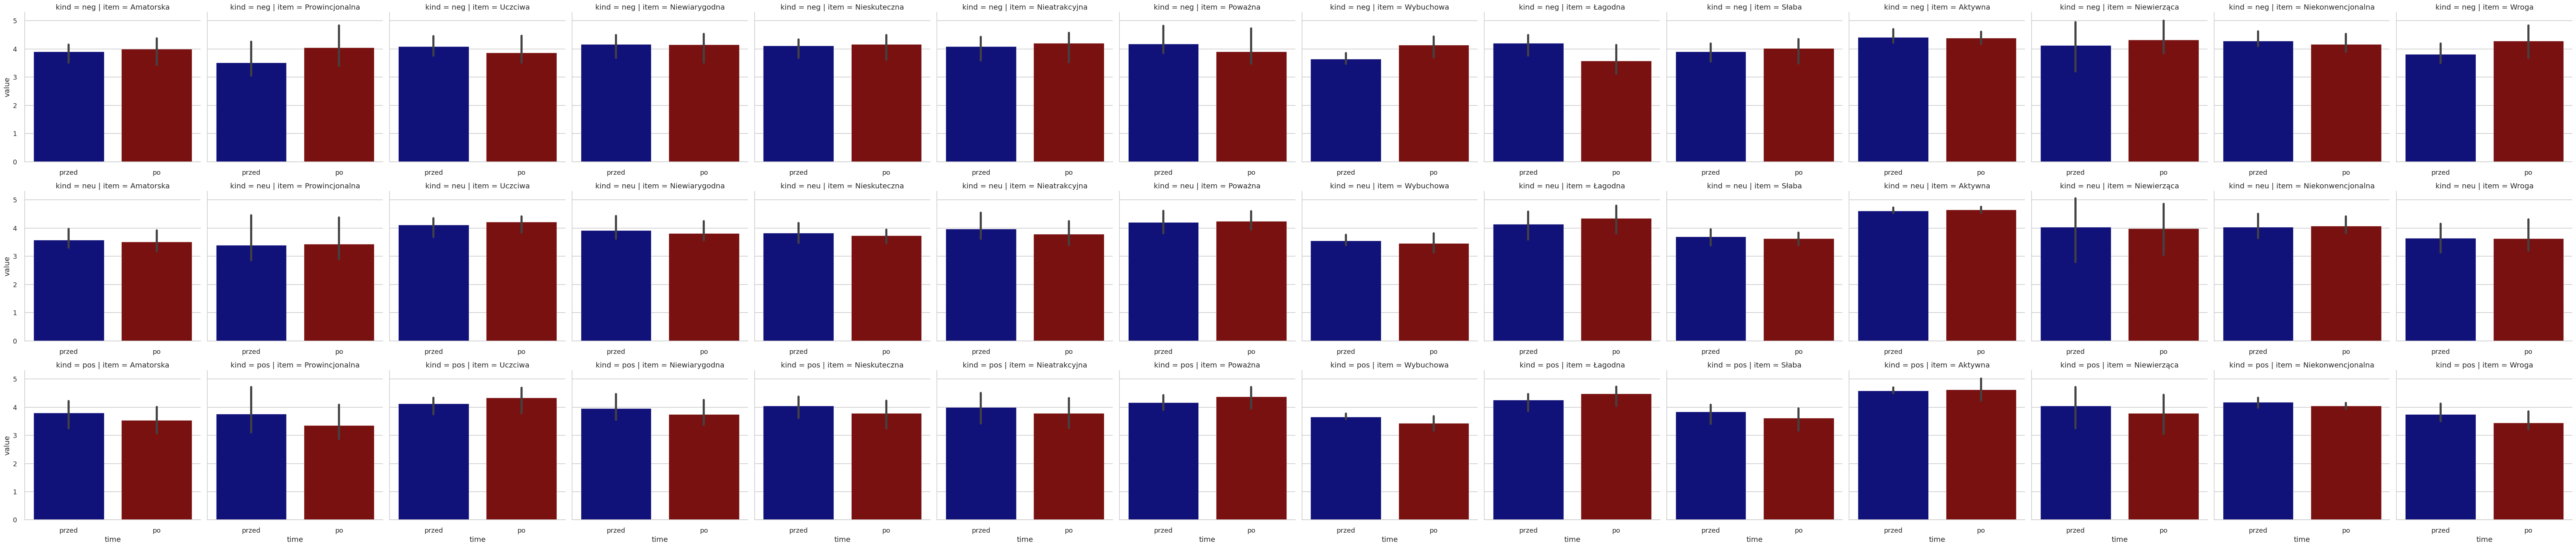

In [ ]:
sns.catplot(kind = 'bar', data = df2grupa_m, col = 'item', y = 'value', 
            row = 'kind', dodge=False, sharex=False, x = 'time', hue = 'time',
            palette = {'przed':'darkblue', 'po':'darkred'}) # palette = {'neg':'red', 'neu':'grey', "pos":'green'}, col_wrap = 4, 
plt.tight_layout()
plt.show()

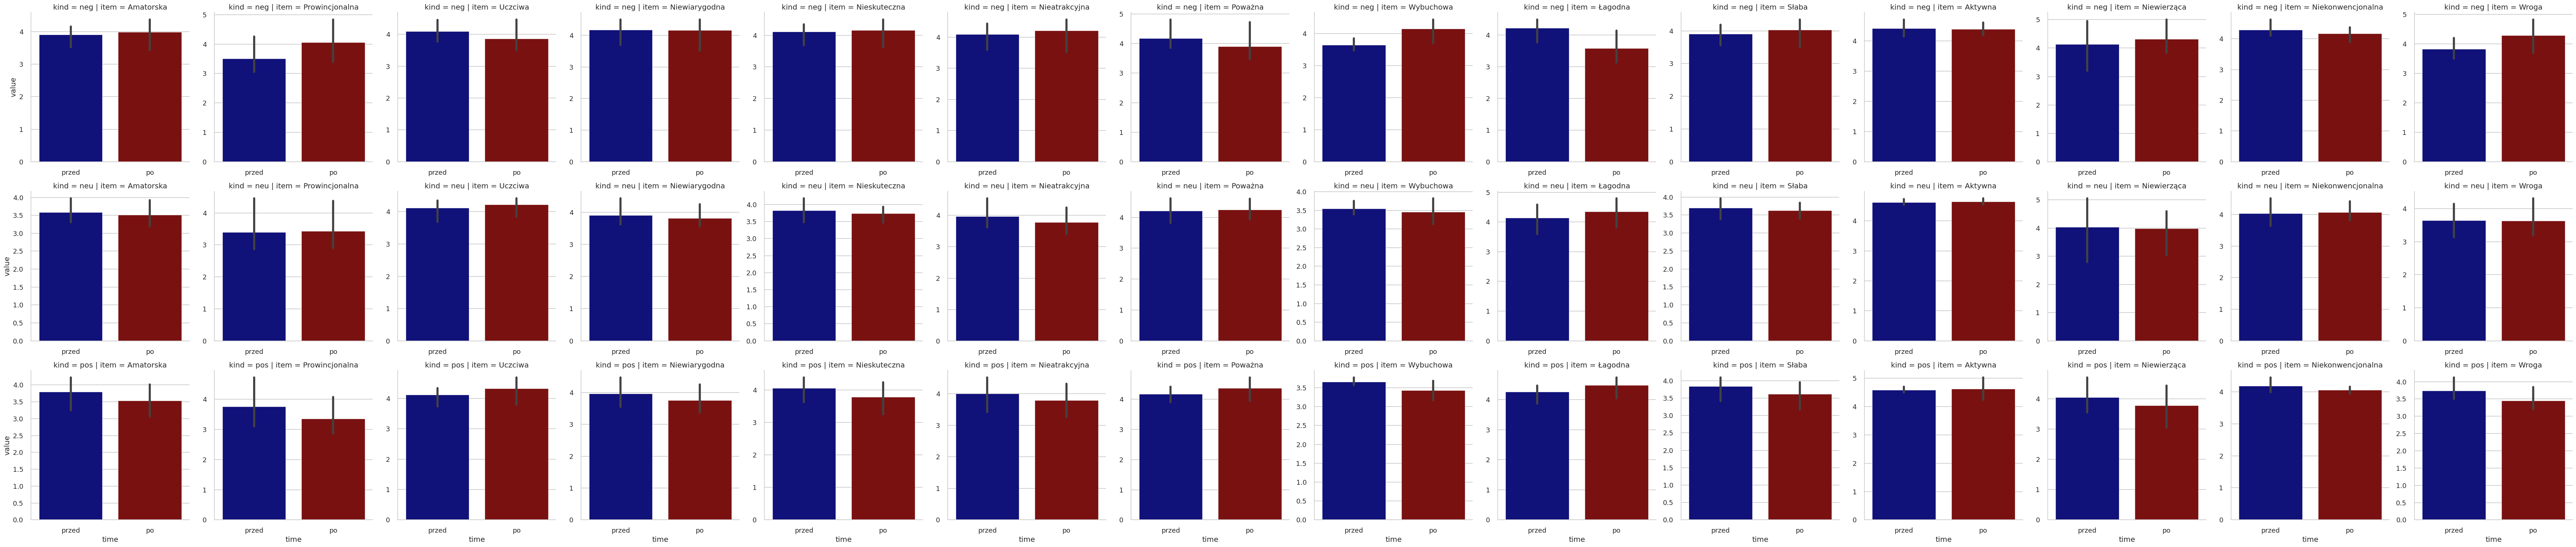

In [ ]:
sns.catplot(kind = 'bar', data = df2grupa_m, col = 'item', y = 'value', 
            row = 'kind', dodge=False, sharex=False, sharey=False, x = 'time', hue = 'time',
            palette = {'przed':'darkblue', 'po':'darkred'}) # palette = {'neg':'red', 'neu':'grey', "pos":'green'}, col_wrap = 4, 
plt.tight_layout()
plt.show()

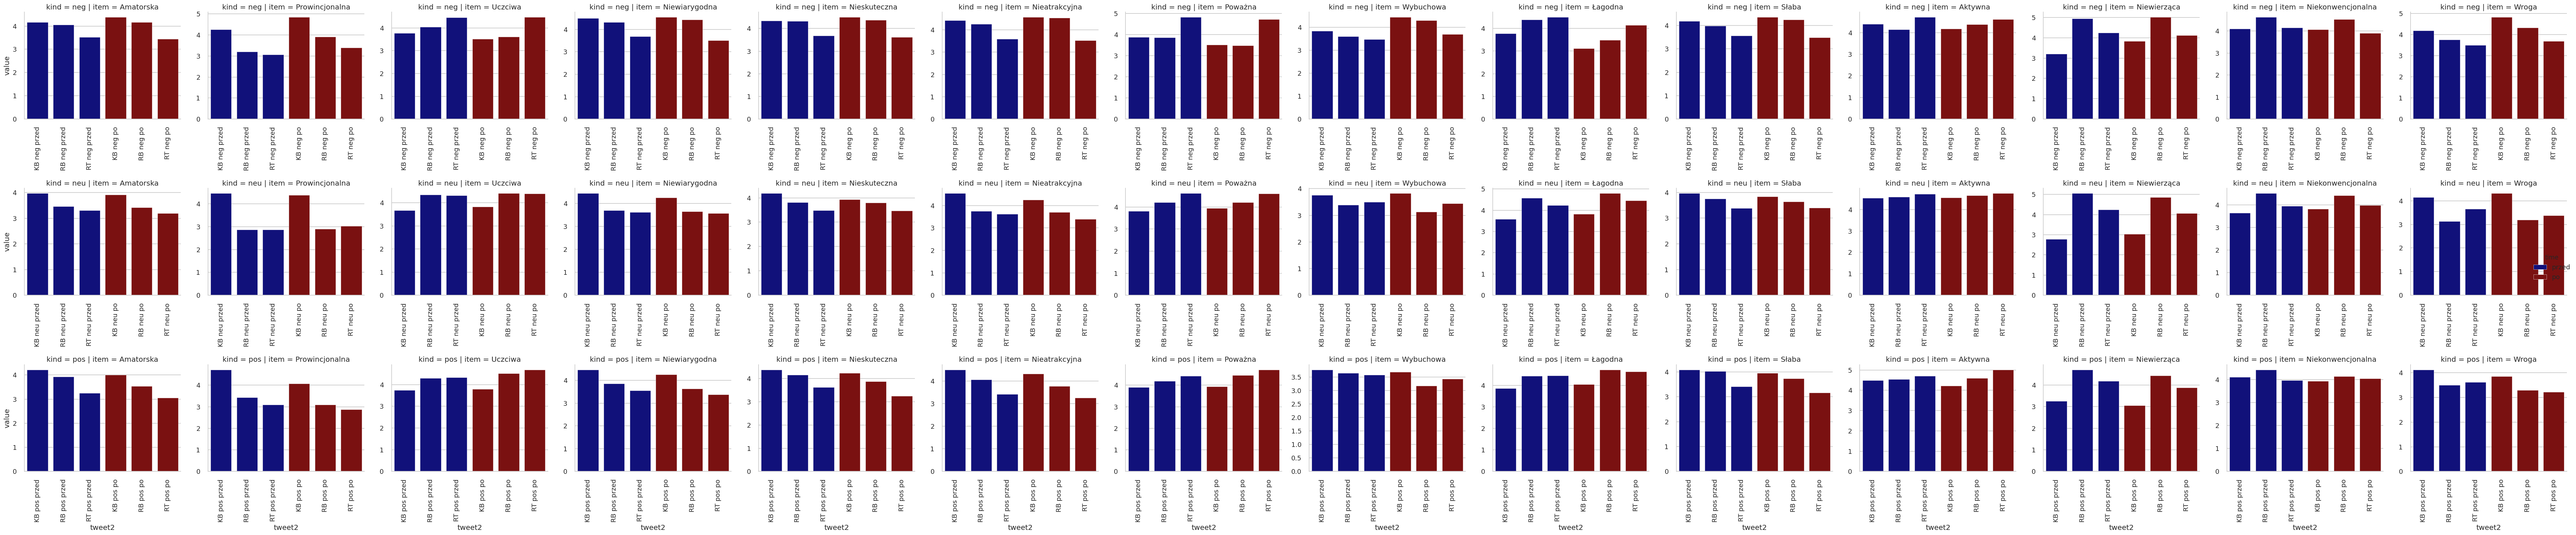

In [ ]:
g = sns.catplot(kind = 'bar', data = df2grupa_m, col = 'item', y = 'value', 
             dodge=False, sharex=False, sharey=False, x = 'tweet2', hue = 'time', row = 'kind',
            palette = {'przed':'darkblue', 'po':'darkred'}) # palette = {'neg':'red', 'neu':'grey', "pos":'green'}, col_wrap = 4, 

g.set_xticklabels(rotation=90)


plt.tight_layout(pad = 1.5)
plt.show()

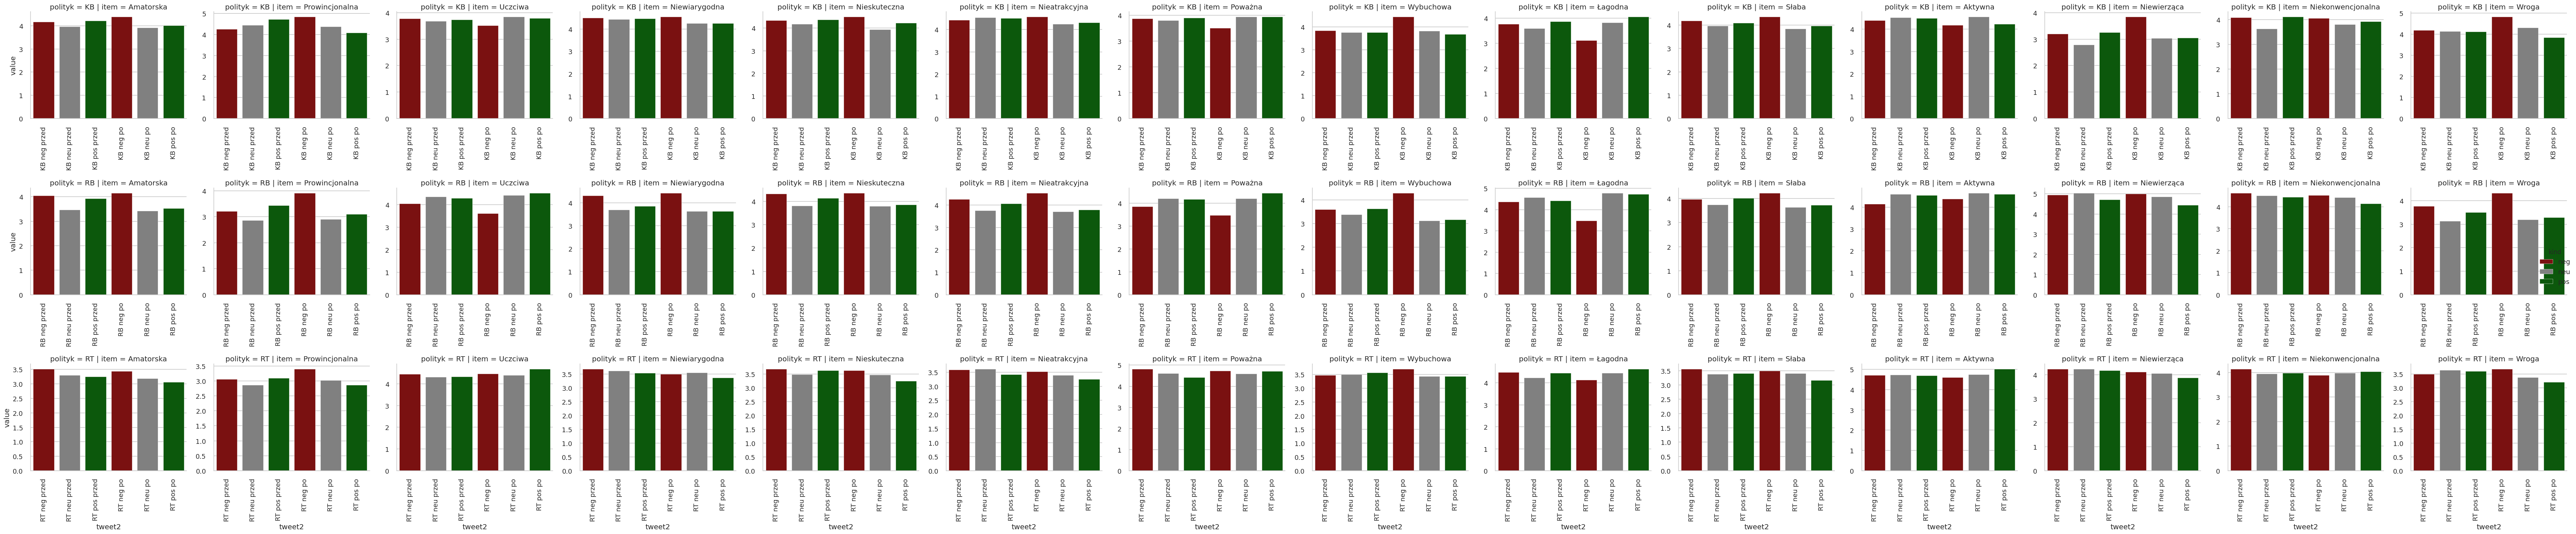

In [ ]:
g = sns.catplot(kind = 'bar', data = df2grupa_m, col = 'item', y = 'value', 
             dodge=False, sharex=False, sharey=False, x = 'tweet2', hue = 'kind', row = 'polityk',
            palette = {'neg':'darkred', 'neu':'grey', "pos":'darkgreen'}) # palette = {'neg':'red', 'neu':'grey', "pos":'green'}, col_wrap = 4, 

g.set_xticklabels(rotation=90)
g.set_xlabel('tweet')


plt.tight_layout(pad = 1.5)
plt.show()

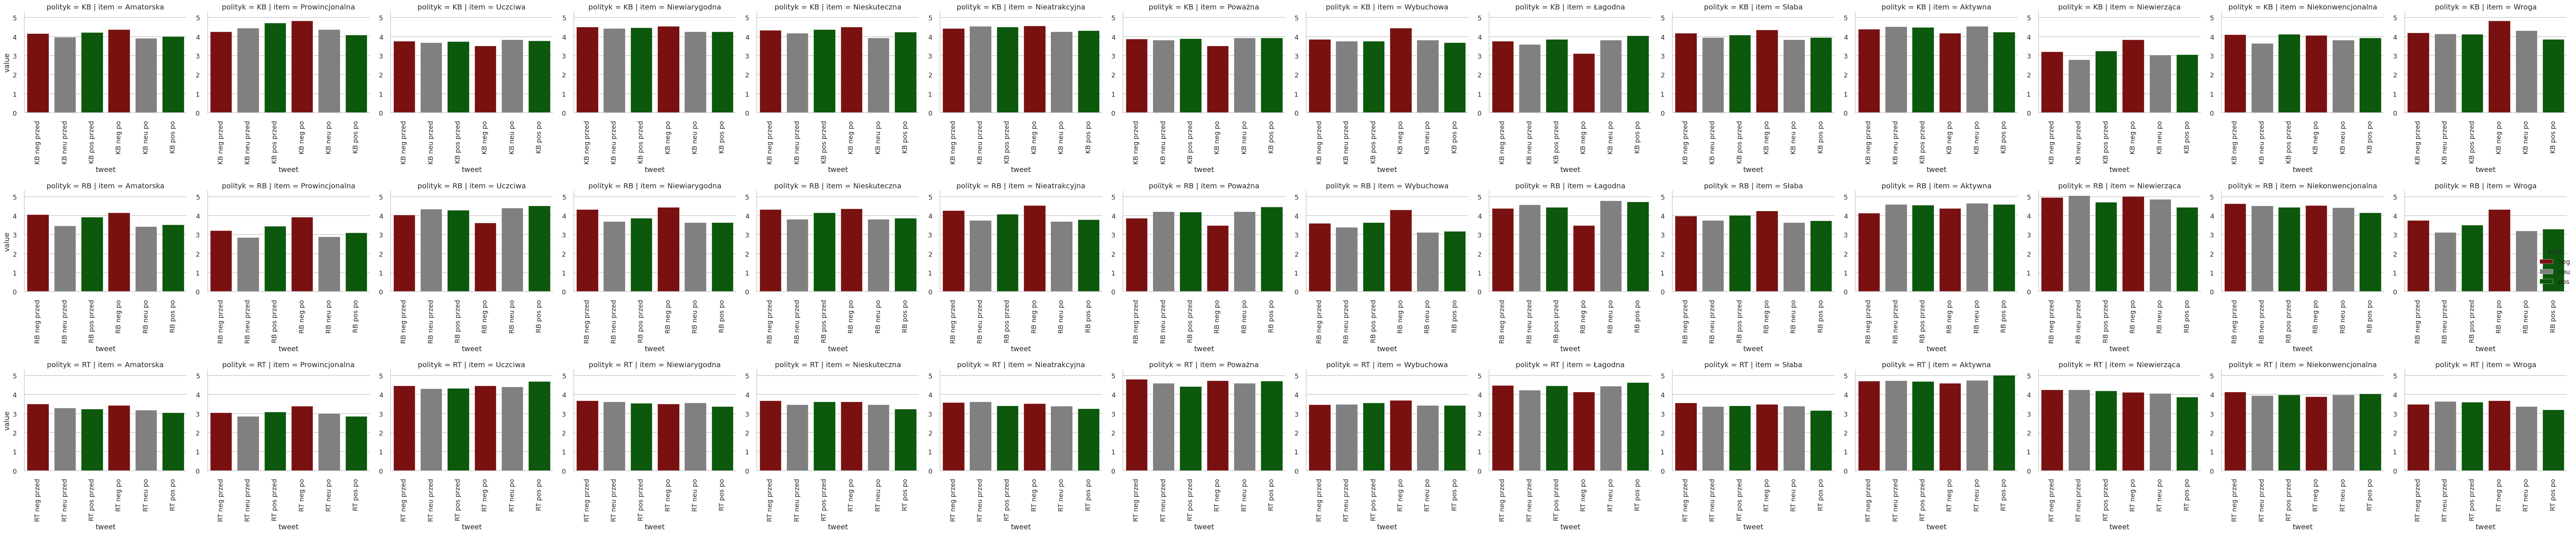

In [ ]:
g = sns.catplot(kind = 'bar', data = df2grupa_m, col = 'item', y = 'value', 
             dodge=False, sharex=False, x = 'tweet2', hue = 'kind', row = 'polityk',
            palette = {'neg':'darkred', 'neu':'grey', "pos":'darkgreen'}) 
# palette = {'neg':'red', 'neu':'grey', "pos":'green'}, col_wrap = 4, 

g.set(xlabel = 'tweet')
g.set_xticklabels(rotation=90)

for ax in g.axes.flatten():
    ax.tick_params(labelleft=True) 
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html#matplotlib.axes.Axes.tick_params


plt.tight_layout(pad = 1.5)
plt.show()

In [ ]:
sns.catplot(kind = 'bar', data = df2grupa_m, col = 'item', y = 'value', 
            row = 'tweet', dodge=False, sharex=False, sharey=False, x = 'time', hue = 'time',
            palette = {'przed':'darkblue', 'po':'darkred'}) # palette = {'neg':'red', 'neu':'grey', "pos":'green'}, col_wrap = 4, 
plt.tight_layout()
plt.show()

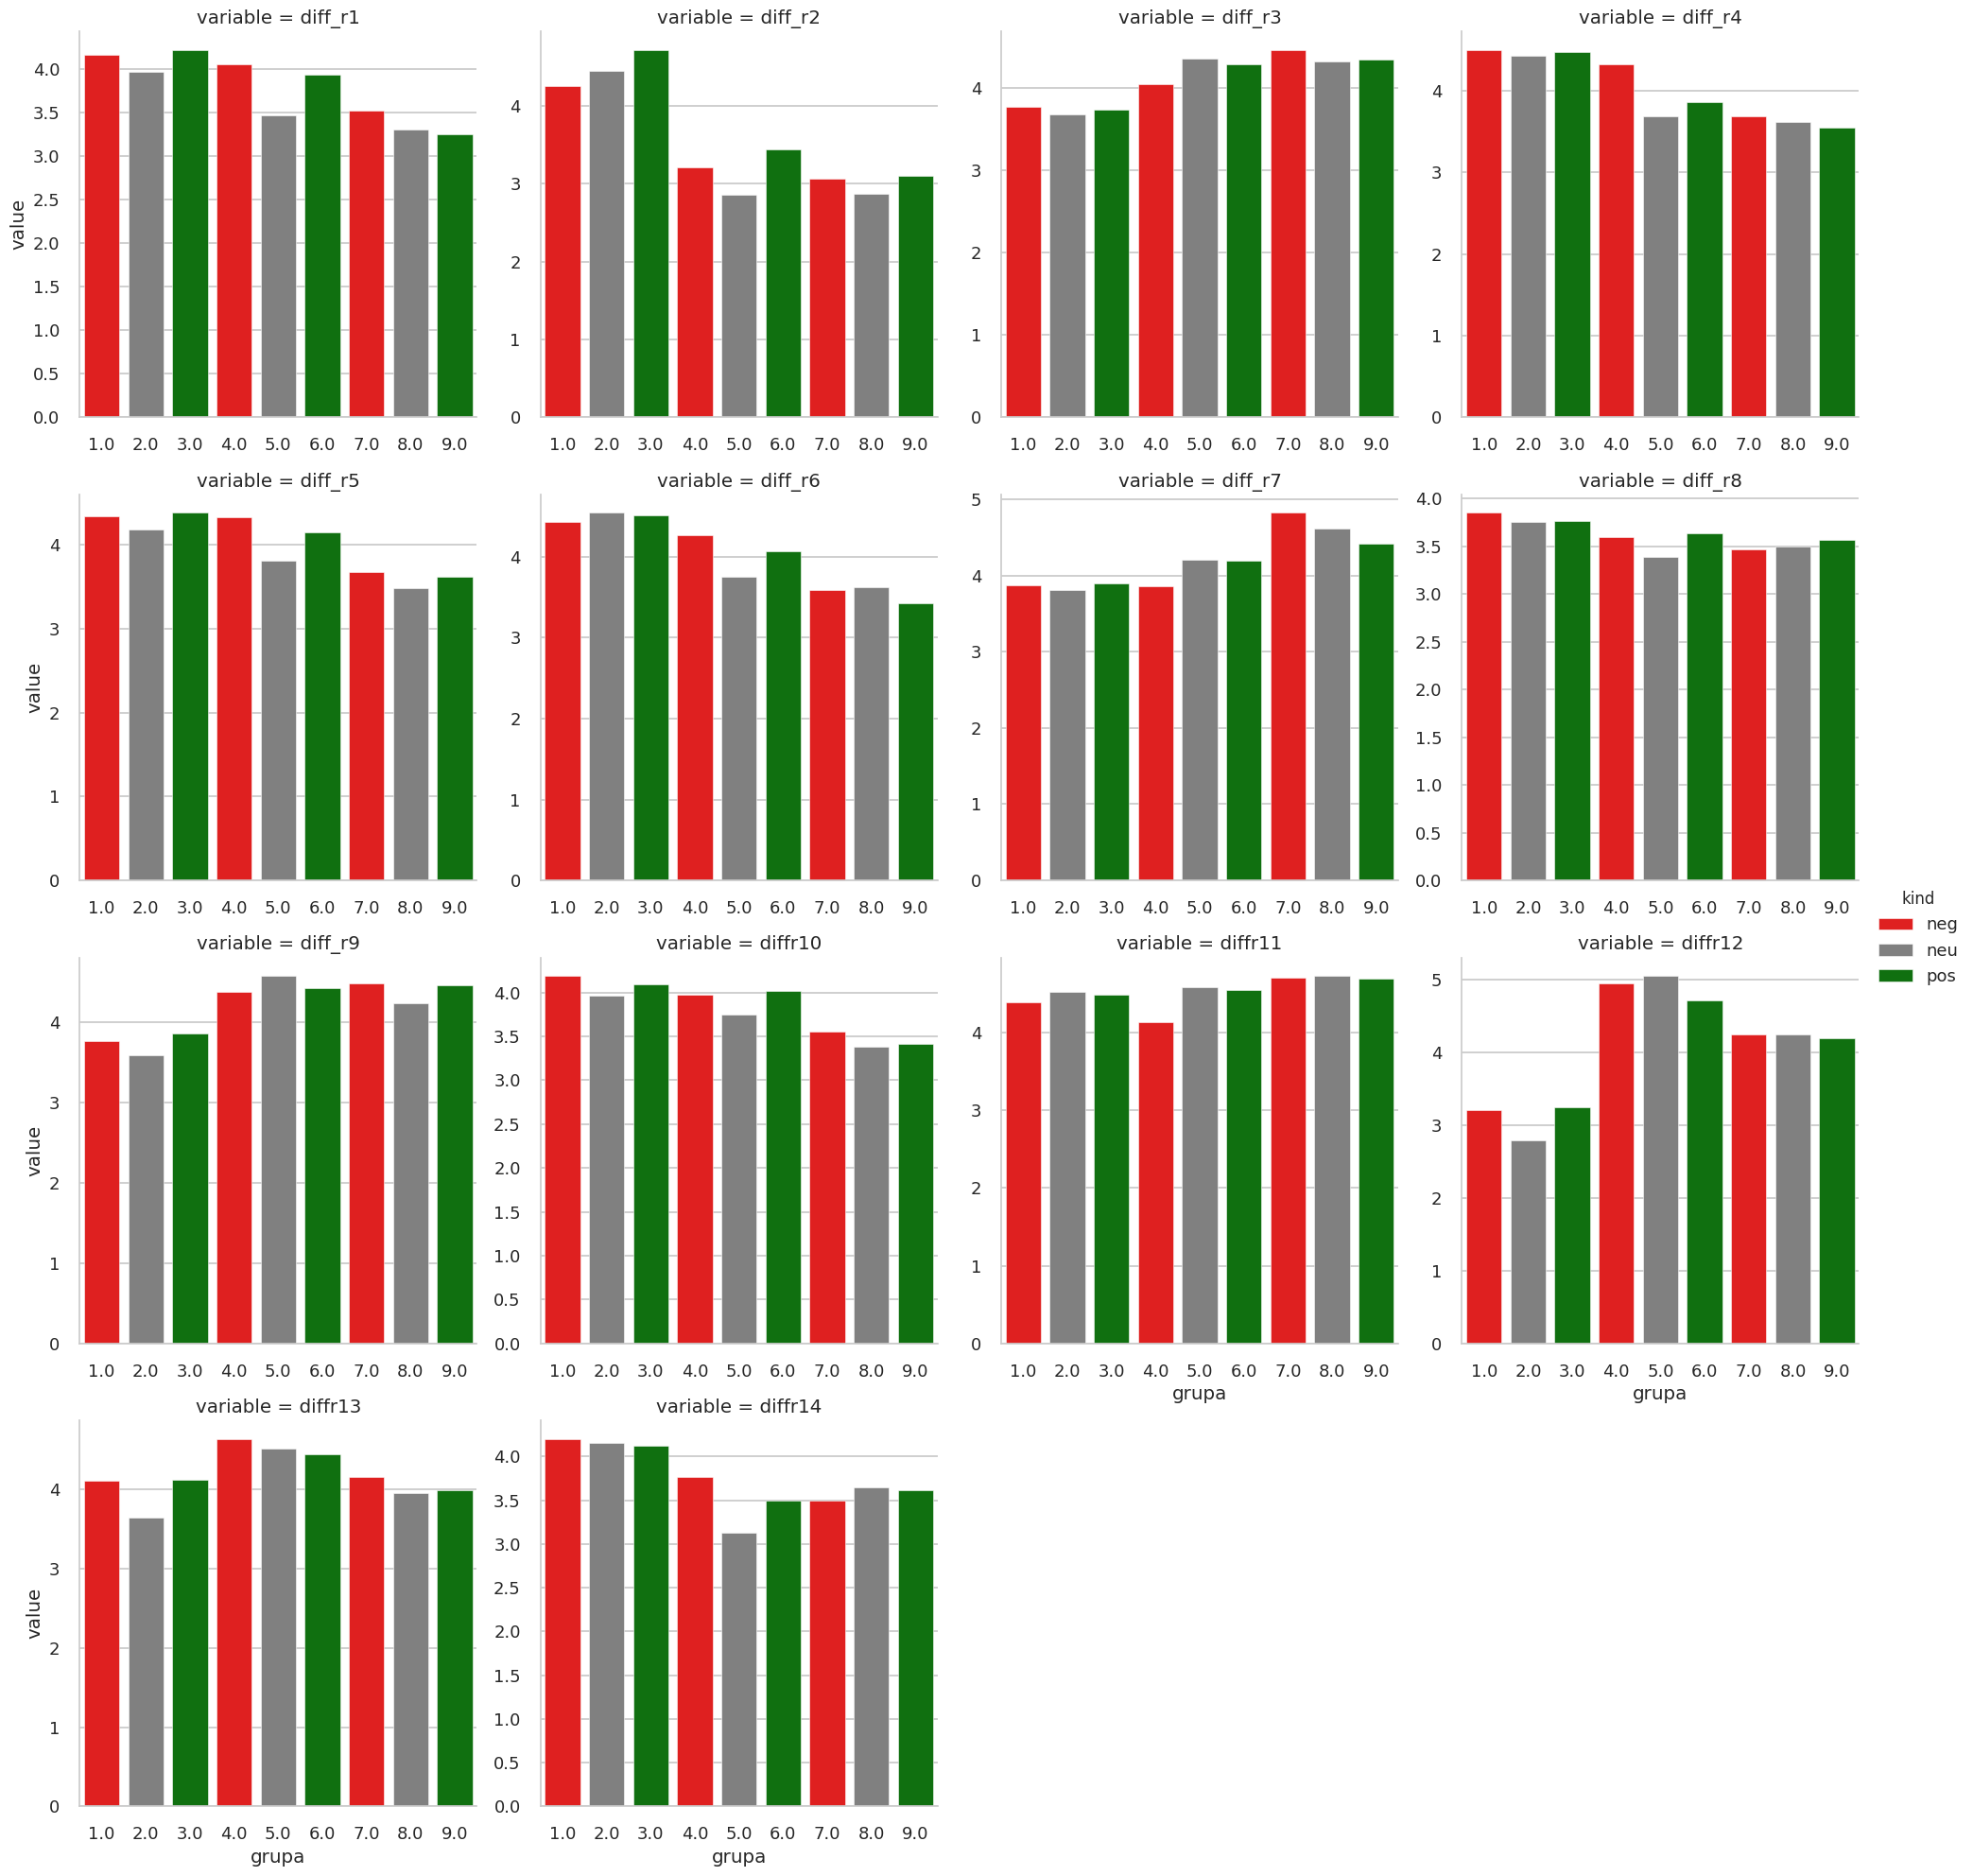

In [ ]:
sns.catplot(kind = 'bar', data =df2grupa_m, col = 'variable', y = 'value', 
            x = 'grupa', col_wrap = 4, dodge=False, sharex=False, sharey=False, hue = 'kind', 
            palette = {'neg':'red', 'neu':'grey', "pos":'green'})# hue = 'grupa'
plt.show()

In [ ]:
df2.p3.fillna(99).value_counts()

1.0    865
2.0     93
Name: p3, dtype: int64

In [ ]:
df2.p4_r1.fillna(99).value_counts()

3.0     310
1.0     215
4.0     179
2.0     147
5.0      95
99.0     12
Name: p4_r1, dtype: int64

In [ ]:
dyfer = [
    'p5_r1', 'p5_r2', 'p5_r3', 'p5_r4', 'p5_r5', 'p5_r6', 'p5_r7', 'p5_r8',
       'p5_r9', 'p5_r10', 'p5_r11', 'p5_r12', 'p5_r13', 'p5_r14',
       'p9_r1', 'p9_r2', 'p9_r3', 'p9_r4', 'p9_r5', 'p9_r6', 'p9_r7', 'p9_r8',
       'p9_r9', 'p9_r10', 'p9_r11', 'p9_r12', 'p9_r13', 'p9_r14']

In [ ]:
df2['variance'] = df2[dyfer].var(axis = 1)
df2['variance'].describe([0.05, 0.075, 0.1, 0.25, 0.5])

count    958.000000
mean       2.845191
std        2.475471
min        0.000000
5%         0.000000
7.5%       0.035714
10%        0.166931
25%        0.714616
50%        2.179894
max        9.333333
Name: variance, dtype: float64

In [ ]:
df2[df2.variance.round(1) < 0.17].shape

(94, 43)

In [ ]:
df2[df2.variance.round(1) < 0.17].sample(5)

,ID,survey_finish_time,sex,sex_r3_input,sex2,age,year,miasta,wyksztalcenie,narodowosc,grupa,p3,p4_r1,p5_r1,p5_r2,p5_r3,p5_r4,p5_r5,p5_r6,p5_r7,p5_r8,p5_r9,p5_r10,p5_r11,p5_r12,p5_r13,p5_r14,p7,p9_r1,p9_r2,p9_r3,p9_r4,p9_r5,p9_r6,p9_r7,p9_r8,p9_r9,p9_r10,p9_r11,p9_r12,p9_r13,p9_r14,variance
587,588.0,405.0,2.0,,NaN,6.0,59.0,4.0,3.0,1.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
582,583.0,427.0,1.0,,NaN,4.0,37.0,2.0,4.0,1.0,6.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
421,422.0,480.0,2.0,,NaN,2.0,24.0,3.0,3.0,1.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
598,599.0,431.0,2.0,,NaN,5.0,48.0,1.0,2.0,1.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
591,592.0,391.0,1.0,,NaN,4.0,37.0,1.0,3.0,1.0,1.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.035714


In [ ]:
df2[df2.variance.round(1) < 0.04].shape

(77, 43)

In [ ]:
df2[df2.variance.round(1) == 0].shape

(77, 43)

In [ ]:
sus = df2[df2.variance.round(1) == 0]
sus

,ID,survey_finish_time,sex,sex_r3_input,sex2,age,year,miasta,wyksztalcenie,narodowosc,grupa,p3,p4_r1,p5_r1,p5_r2,p5_r3,p5_r4,p5_r5,p5_r6,p5_r7,p5_r8,p5_r9,p5_r10,p5_r11,p5_r12,p5_r13,p5_r14,p7,p9_r1,p9_r2,p9_r3,p9_r4,p9_r5,p9_r6,p9_r7,p9_r8,p9_r9,p9_r10,p9_r11,p9_r12,p9_r13,p9_r14,variance
19,20.0,405.0,2.0,,NaN,3.0,32.0,4.0,3.0,1.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
24,25.0,796.0,2.0,,NaN,4.0,39.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
68,69.0,1516.0,1.0,,NaN,6.0,61.0,1.0,4.0,1.0,7.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
85,86.0,428.0,1.0,,NaN,3.0,34.0,1.0,3.0,1.0,3.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,0.035714
101,102.0,616.0,1.0,,NaN,5.0,51.0,4.0,3.0,1.0,2.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,884.0,417.0,2.0,,NaN,4.0,38.0,4.0,3.0,1.0,1.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
891,892.0,515.0,1.0,,NaN,2.0,22.0,3.0,4.0,1.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
898,899.0,351.0,2.0,,NaN,2.0,23.0,1.0,3.0,1.0,4.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
901,902.0,367.0,1.0,,NaN,5.0,51.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000


In [ ]:
cols = ['sex', 'age', 'miasta', 'wyksztalcenie', 'p4_r1', 'p5_r1','p5_r2','p5_r3','p5_r4','p5_r5','p5_r6','p5_r7','p5_r8','p5_r9',
 'p5_r10','p5_r11','p5_r12','p5_r13','p5_r14','p9_r1','p9_r2','p9_r3','p9_r4','p9_r5',
 'p9_r6','p9_r7','p9_r8','p9_r9','p9_r10','p9_r11','p9_r12','p9_r13','p9_r14']

In [ ]:
sus_g1 = sus.groupby(cols, as_index=False).size().sort_values(by = 'size', ascending=False)
sus_g1

,sex,age,miasta,wyksztalcenie,p4_r1,p5_r1,p5_r2,p5_r3,p5_r4,p5_r5,p5_r6,p5_r7,p5_r8,p5_r9,p5_r10,p5_r11,p5_r12,p5_r13,p5_r14,p9_r1,p9_r2,p9_r3,p9_r4,p9_r5,p9_r6,p9_r7,p9_r8,p9_r9,p9_r10,p9_r11,p9_r12,p9_r13,p9_r14,size
31,2.0,2.0,1.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3
13,1.0,4.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2
41,2.0,3.0,2.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2
22,1.0,6.0,1.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2
44,2.0,3.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,1.0,6.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1
28,1.0,6.0,3.0,3.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1
29,1.0,6.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1
30,1.0,6.0,5.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1


In [ ]:
sus_g1[sus_g1['size']>1]

,sex,age,miasta,wyksztalcenie,p4_r1,p5_r1,p5_r2,p5_r3,p5_r4,p5_r5,p5_r6,p5_r7,p5_r8,p5_r9,p5_r10,p5_r11,p5_r12,p5_r13,p5_r14,p9_r1,p9_r2,p9_r3,p9_r4,p9_r5,p9_r6,p9_r7,p9_r8,p9_r9,p9_r10,p9_r11,p9_r12,p9_r13,p9_r14,size
31,2.0,2.0,1.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3
13,1.0,4.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2
41,2.0,3.0,2.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2
22,1.0,6.0,1.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2
44,2.0,3.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2
47,2.0,4.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2
34,2.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2
2,1.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2
60,2.0,6.0,1.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2


In [ ]:
77*100/958

8.037578288100208

In [ ]:
cols2 = ['ID', 'p5_r1','p5_r2','p5_r3','p5_r4','p5_r5','p5_r6','p5_r7','p5_r8','p5_r9',
 'p5_r10','p5_r11','p5_r12','p5_r13','p5_r14','p9_r1','p9_r2','p9_r3','p9_r4','p9_r5',
 'p9_r6','p9_r7','p9_r8','p9_r9','p9_r10','p9_r11','p9_r12','p9_r13','p9_r14']

In [ ]:
df2.sample()

,ID,survey_finish_time,sex,sex_r3_input,sex2,age,year,miasta,wyksztalcenie,narodowosc,grupa,p3,p4_r1,p5_r1,p5_r2,p5_r3,p5_r4,p5_r5,p5_r6,p5_r7,p5_r8,p5_r9,p5_r10,p5_r11,p5_r12,p5_r13,p5_r14,p7,p9_r1,p9_r2,p9_r3,p9_r4,p9_r5,p9_r6,p9_r7,p9_r8,p9_r9,p9_r10,p9_r11,p9_r12,p9_r13,p9_r14,variance
628,629.0,407.0,1.0,,NaN,6.0,56.0,4.0,3.0,1.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.328042


In [ ]:
dyfer_dict_abs = {}

In [ ]:
for p in dyfer:
  df2p = pd.DataFrame( abs(df2[p].values - df2[p].values[:, None]) )
  dyfer_dict_abs[p] = df2p.reset_index()

In [ ]:
df2p_all = pd.concat(dyfer_dict_abs.values(), axis = 0, ignore_index=True)
df2p_all

index    0    1    2    3    4    5    6    7    8    9   10   11   12  \
0          0  0.0  3.0  4.0  0.0  3.0  1.0  5.0  1.0  5.0  3.0  3.0  0.0  3.0   
1          1  3.0  0.0  1.0  3.0  0.0  2.0  2.0  2.0  2.0  0.0  0.0  3.0  0.0   
2          2  4.0  1.0  0.0  4.0  1.0  3.0  1.0  3.0  1.0  1.0  1.0  4.0  1.0   
3          3  0.0  3.0  4.0  0.0  3.0  1.0  5.0  1.0  5.0  3.0  3.0  0.0  3.0   
4          4  3.0  0.0  1.0  3.0  0.0  2.0  2.0  2.0  2.0  0.0  0.0  3.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
26819    953  3.0  3.0  1.0  4.0  1.0  4.0  2.0  4.0  4.0  1.0  0.0  4.0  2.0   
26820    954  2.0  2.0  2.0  3.0  0.0  3.0  3.0  3.0  3.0  2.0  1.0  3.0  1.0   
26821    955  3.0  3.0  1.0  4.0  1.0  4.0  2.0  4.0  4.0  1.0  0.0  4.0  2.0   
26822    956  0.0  0.0  4.0  1.0  2.0  1.0  5.0  1.0  1.0  4.0  3.0  1.0  1.0   
26823    957  2.0  2.0  2.0  3.0  0.0  3.0  3.0  3.0  3.0  2.0  1.0  3.0  1.0   

        13   14   15   16   17   18   19   20   21   22   23   24   25   26  \
0      2.0  6.0  5.0  3.0  6.0  1.0  3.0  1.0  0.0  2.0  4.0  3.0  3.0  2.0   
1      1.0  3.0  2.0  0.0  3.0  2.0  0.0  2.0  3.0  1.0  1.0  0.0  0.0  1.0   
2      2.0  2.0  1.0  1.0  2.0  3.0  1.0  3.0  4.0  2.0  0.0  1.0  1.0  2.0   
3      2.0  6.0  5.0  3.0  6.0  1.0  3.0  1.0  0.0  2.0  4.0  3.0  3.0  2.0   
4      1.0  3.0  2.0  0.0  3.0  2.0  0.0  2.0  3.0  1.0  1.0  0.0  0.0  1.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
26819  2.0  2.0  3.0  4.0  0.0  3.0  1.0  1.0  4.0  0.0  2.0  1.0  4.0  2.0   
26820  1.0  3.0  2.0  3.0  1.0  2.0  0.0  0.0  3.0  1.0  3.0  0.0  3.0  1.0   
26821  2.0  2.0  3.0  4.0  0.0  3.0  1.0  1.0  4.0  0.0  2.0  1.0  4.0  2.0   
26822  1.0  5.0  0.0  1.0  3.0  0.0  2.0  2.0  1.0  3.0  5.0  2.0  1.0  1.0   
26823  1.0  3.0  2.0  3.0  1.0  2.0  0.0  0.0  3.0  1.0  3.0  0.0  3.0  1.0   

        27   28   29   30   31   32   33   34   35   36   37   38   39   40  \
0      1.0  6.0  2.0  3.0  6.0  2.0  2.0  3.0  1.0  6.0  5.0  3.0  3.0  5.0   
1      2.0  3.0  1.0  0.0  3.0  1.0  1.0  0.0  2.0  3.0  2.0  0.0  0.0  2.0   
2      3.0  2.0  2.0  1.0  2.0  2.0  2.0  1.0  3.0  2.0  1.0  1.0  1.0  1.0   
3      1.0  6.0  2.0  3.0  6.0  2.0  2.0  3.0  1.0  6.0  5.0  3.0  3.0  5.0   
4      2.0  3.0  1.0  0.0  3.0  1.0  1.0  0.0  2.0  3.0  2.0  0.0  0.0  2.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
26819  2.0  2.0  0.0  2.0  2.0  1.0  2.0  2.0  2.0  2.0  1.0  1.0  2.0  2.0   
26820  1.0  3.0  1.0  1.0  3.0  0.0  1.0  1.0  1.0  3.0  0.0  0.0  1.0  3.0   
26821  2.0  2.0  0.0  2.0  2.0  1.0  2.0  2.0  2.0  2.0  1.0  1.0  2.0  2.0   
26822  1.0  5.0  3.0  1.0  5.0  2.0  1.0  1.0  1.0  5.0  2.0  2.0  1.0  5.0   
26823  1.0  3.0  1.0  1.0  3.0  0.0  1.0  1.0  1.0  3.0  0.0  0.0  1.0  3.0   

        41   42   43   44   45   46   47   48   49   50   51   52   53   54  \
0      4.0  2.0  2.0  0.0  2.0  0.0  3.0  3.0  3.0  5.0  3.0  3.0  1.0  3.0   
1      1.0  1.0  1.0  3.0  1.0  3.0  0.0  0.0  0.0  2.0  0.0  0.0  2.0  0.0   
2      0.0  2.0  2.0  4.0  2.0  4.0  1.0  1.0  1.0  1.0  1.0  1.0  3.0  1.0   
3      4.0  2.0  2.0  0.0  2.0  0.0  3.0  3.0  3.0  5.0  3.0  3.0  1.0  3.0   
4      1.0  1.0  1.0  3.0  1.0  3.0  0.0  0.0  0.0  2.0  0.0  0.0  2.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
26819  1.0  3.0  1.0  3.0  3.0  4.0  0.0  1.0  1.0  1.0  2.0  1.0  3.0  1.0   
26820  2.0  2.0  0.0  2.0  2.0  3.0  1.0  0.0  0.0  2.0  1.0  0.0  2.0  2.0   
26821  1.0  3.0  1.0  3.0  3.0  4.0  0.0  1.0  1.0  1.0  2.0  1.0  3.0  1.0   
26822  4.0  0.0  2.0  0.0  0.0  1.0  3.0  2.0  2.0  4.0  1.0  2.0  0.0  4.0   
26823  2.0  2.0  0.0  2.0  2.0  3.0  1.0  0.0  0.0  2.0  1.0  0.0  2.0  2.0   

        55   56   57   58   59   60   61   62   63   64   65   66   67   68  \
0      0.0  5.0  0.0  1.0  3.0  6.0  4.0  3.0  0.0  3.0  4.0  4.0  5.0  3.0   
1      3.0  2.0  3.0  2.0  0.

In [ ]:
df2p_all = df2p_all.rename(columns = {'index':'id'})
df2p_all

id    0    1    2    3    4    5    6    7    8    9   10   11   12  \
0        0  0.0  3.0  4.0  0.0  3.0  1.0  5.0  1.0  5.0  3.0  3.0  0.0  3.0   
1        1  3.0  0.0  1.0  3.0  0.0  2.0  2.0  2.0  2.0  0.0  0.0  3.0  0.0   
2        2  4.0  1.0  0.0  4.0  1.0  3.0  1.0  3.0  1.0  1.0  1.0  4.0  1.0   
3        3  0.0  3.0  4.0  0.0  3.0  1.0  5.0  1.0  5.0  3.0  3.0  0.0  3.0   
4        4  3.0  0.0  1.0  3.0  0.0  2.0  2.0  2.0  2.0  0.0  0.0  3.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
26819  953  3.0  3.0  1.0  4.0  1.0  4.0  2.0  4.0  4.0  1.0  0.0  4.0  2.0   
26820  954  2.0  2.0  2.0  3.0  0.0  3.0  3.0  3.0  3.0  2.0  1.0  3.0  1.0   
26821  955  3.0  3.0  1.0  4.0  1.0  4.0  2.0  4.0  4.0  1.0  0.0  4.0  2.0   
26822  956  0.0  0.0  4.0  1.0  2.0  1.0  5.0  1.0  1.0  4.0  3.0  1.0  1.0   
26823  957  2.0  2.0  2.0  3.0  0.0  3.0  3.0  3.0  3.0  2.0  1.0  3.0  1.0   

        13   14   15   16   17   18   19   20   21   22   23   24   25   26  \
0      2.0  6.0  5.0  3.0  6.0  1.0  3.0  1.0  0.0  2.0  4.0  3.0  3.0  2.0   
1      1.0  3.0  2.0  0.0  3.0  2.0  0.0  2.0  3.0  1.0  1.0  0.0  0.0  1.0   
2      2.0  2.0  1.0  1.0  2.0  3.0  1.0  3.0  4.0  2.0  0.0  1.0  1.0  2.0   
3      2.0  6.0  5.0  3.0  6.0  1.0  3.0  1.0  0.0  2.0  4.0  3.0  3.0  2.0   
4      1.0  3.0  2.0  0.0  3.0  2.0  0.0  2.0  3.0  1.0  1.0  0.0  0.0  1.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
26819  2.0  2.0  3.0  4.0  0.0  3.0  1.0  1.0  4.0  0.0  2.0  1.0  4.0  2.0   
26820  1.0  3.0  2.0  3.0  1.0  2.0  0.0  0.0  3.0  1.0  3.0  0.0  3.0  1.0   
26821  2.0  2.0  3.0  4.0  0.0  3.0  1.0  1.0  4.0  0.0  2.0  1.0  4.0  2.0   
26822  1.0  5.0  0.0  1.0  3.0  0.0  2.0  2.0  1.0  3.0  5.0  2.0  1.0  1.0   
26823  1.0  3.0  2.0  3.0  1.0  2.0  0.0  0.0  3.0  1.0  3.0  0.0  3.0  1.0   

        27   28   29   30   31   32   33   34   35   36   37   38   39   40  \
0      1.0  6.0  2.0  3.0  6.0  2.0  2.0  3.0  1.0  6.0  5.0  3.0  3.0  5.0   
1      2.0  3.0  1.0  0.0  3.0  1.0  1.0  0.0  2.0  3.0  2.0  0.0  0.0  2.0   
2      3.0  2.0  2.0  1.0  2.0  2.0  2.0  1.0  3.0  2.0  1.0  1.0  1.0  1.0   
3      1.0  6.0  2.0  3.0  6.0  2.0  2.0  3.0  1.0  6.0  5.0  3.0  3.0  5.0   
4      2.0  3.0  1.0  0.0  3.0  1.0  1.0  0.0  2.0  3.0  2.0  0.0  0.0  2.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
26819  2.0  2.0  0.0  2.0  2.0  1.0  2.0  2.0  2.0  2.0  1.0  1.0  2.0  2.0   
26820  1.0  3.0  1.0  1.0  3.0  0.0  1.0  1.0  1.0  3.0  0.0  0.0  1.0  3.0   
26821  2.0  2.0  0.0  2.0  2.0  1.0  2.0  2.0  2.0  2.0  1.0  1.0  2.0  2.0   
26822  1.0  5.0  3.0  1.0  5.0  2.0  1.0  1.0  1.0  5.0  2.0  2.0  1.0  5.0   
26823  1.0  3.0  1.0  1.0  3.0  0.0  1.0  1.0  1.0  3.0  0.0  0.0  1.0  3.0   

        41   42   43   44   45   46   47   48   49   50   51   52   53   54  \
0      4.0  2.0  2.0  0.0  2.0  0.0  3.0  3.0  3.0  5.0  3.0  3.0  1.0  3.0   
1      1.0  1.0  1.0  3.0  1.0  3.0  0.0  0.0  0.0  2.0  0.0  0.0  2.0  0.0   
2      0.0  2.0  2.0  4.0  2.0  4.0  1.0  1.0  1.0  1.0  1.0  1.0  3.0  1.0   
3      4.0  2.0  2.0  0.0  2.0  0.0  3.0  3.0  3.0  5.0  3.0  3.0  1.0  3.0   
4      1.0  1.0  1.0  3.0  1.0  3.0  0.0  0.0  0.0  2.0  0.0  0.0  2.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
26819  1.0  3.0  1.0  3.0  3.0  4.0  0.0  1.0  1.0  1.0  2.0  1.0  3.0  1.0   
26820  2.0  2.0  0.0  2.0  2.0  3.0  1.0  0.0  0.0  2.0  1.0  0.0  2.0  2.0   
26821  1.0  3.0  1.0  3.0  3.0  4.0  0.0  1.0  1.0  1.0  2.0  1.0  3.0  1.0   
26822  4.0  0.0  2.0  0.0  0.0  1.0  3.0  2.0  2.0  4.0  1.0  2.0  0.0  4.0   
26823  2.0  2.0  0.0  2.0  2.0  3.0  1.0  0.0  0.0  2.0  1.0  0.0  2.0  2.0   

        55   56   57   58   59   60   61   62   63   64   65   66   67   68  \
0      0.0  5.0  0.0  1.0  3.0  6.0  4.0  3.0  0.0  3.0  4.0  4.0  5.0  3.0   
1      3.0  2.0  3.0  2.0  0.0  3.0  1.0  0.0  3.0  0.

In [ ]:
df2p_all_idsum = df2p_all.groupby('id', as_index = False).sum()
df2p_all_idavg = df2p_all.groupby('id', as_index = False).mean()

#df2p_all_idsum

In [ ]:
df2p_all_idavg.iloc[:2, 1:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957
0,0.000000,2.464286,2.535714,1.107143,2.035714,0.892857,2.535714,1.178571,1.678571,2.428571,2.678571,1.428571,1.607143,1.428571,3.321429,1.642857,2.357143,3.821429,0.821429,1.892857,1.464286,1.464286,1.857143,3.928571,1.892857,1.428571,1.107143,1.607143,4.250000,2.107143,2.142

In [ ]:
df2[df2.ID.isin([ 4,22 ])]

,ID,survey_finish_time,sex,sex_r3_input,sex2,age,year,miasta,wyksztalcenie,narodowosc,grupa,p3,p4_r1,p5_r1,p5_r2,p5_r3,p5_r4,p5_r5,p5_r6,p5_r7,p5_r8,p5_r9,p5_r10,p5_r11,p5_r12,p5_r13,p5_r14,p7,p9_r1,p9_r2,p9_r3,p9_r4,p9_r5,p9_r6,p9_r7,p9_r8,p9_r9,p9_r10,p9_r11,p9_r12,p9_r13,p9_r14,variance
3,4.0,2558.0,2.0,,NaN,6.0,61.0,1.0,3.0,1.0,8.0,1.0,5.0,1.0,1.0,7.0,1.0,1.0,1.0,7.0,1.0,7.0,1.0,7.0,1.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,1.0,1.0,7.0,1.0,7.0,1.0,7.0,1.0,1.0,1.0,7.619048
21,22.0,438.0,2.0,,NaN,5.0,50.0,3.0,4.0,1.0,8.0,1.0,5.0,1.0,1.0,7.0,1.0,1.0,1.0,7.0,1.0,7.0,1.0,7.0,1.0,7.0,1.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,7.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,7.619048


In [ ]:
df2p_all_idavg = df2p_all_idavg.round()#.applymap(lambda x: np.floor(x))

In [ ]:
df2p_all_idsum.tail(2)

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957
956,956,41.0,58.0,60.0,54.0,38.0,32.0,74.0,42.0,36.0,61.0,70.0,51.0,34.0,25.0,90.0,33.0,57.0,88.0,30.0,34.0,36.0,54.0,39.0,95.0,34.0,43.0,24.0,34.0,106.0,48.0,45.0,114.0,31.0,24.0,33.0,34.0,104.0,56.0,32.0,33.0,104.0,64.0,22.0,38.0,28.0,35.0,39.0,39.0,36.0,47.0,72.0,31.0,38

In [ ]:
df2p_all_idsum_valcont = df2p_all_idsum.iloc[:, 1:].apply(pd.Series.value_counts, axis=1)#.fillna(0)
df2p_all_idsum_valcont

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,2.0,3.0,2.0,7.0,7.0,8.0,8.0,6.0,8.0,7.0,11.0,26.0,18.0,19.0,7.0,22.0,18.0,14.0,18.0,21.0,18.0,22.0,11.0,15.0,16.0,21.0,18.0,16.0,13.0,14.0,13.0,21.0,20.0,74.0,22.0,21.0,16.0,19.0,8.0,17.0,16.0,7.0,9.0,9.0,12.0,6.0,7.0,6.0,11.0,8.0,8.0,6.0,7.0,6.0,3.0,9.0,2.0,3.0,9.0,2.0,2.0,6.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,7.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,1.0,1.0,6.0,1.0,4.0,3.0,1.0,2.0,5.0,4.0,6.0,1.0,6.0,5.0,1.0,2.0,5.0,6.0,1.0,1.0,4.0,1.0,4.0,1.0,3.0,2.0,1.0,NaN,5.0,NaN,3.0,NaN,4.0,3.0,3.0,NaN,2.0,1.0,1.0,1.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,6.0,70.0,13.0,22.0,14.0,18.0,18.0,19.0,22.0,23.0,15.0,31.0,29.0,25.0,22.0,24.0,20.0,25.0,21.0,17.0,19.0,11.0,24.0,17.0,21.0,17.0,13.0,18.0,15.0,24.0,14.0,12.0,11.0,19.0,10.0,14.0,15.0,15.0,9.0,25.0,7.0,8.0,6.0,6.0,9.0,9.0,4.0,3.0,6.0,9.0,4.0,5.0,6.0,1.0,4.0,4.0,4.0,8.0,3.0,6.0,2.0,10.0,4.0,2.0,3.0,8.0,1.0,4.0,7.0,3.0,1.0,14.0,1.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,7.0,9.0,14.0,10.0,17.0,28.0,91.0,29.0,25.0,23.0,27.0,24.0,26.0,23.0,26.0,24.0,15.0,23.0,26.0,20.0,18.0,17.0,19.0,21.0,22.0,13.0,23.0,13.0,21.0,15.0,18.0,15.0,11.0,8.0,8.0,11.0,29.0,8.0,12.0,5.0,9.0,7.0,7.0,12.0,6.0,1.0,7.0,2.0,6.0,5.0,2.0,7.0,3.0,4.0,6.0,4.0,6.0,1.0,4.0,NaN,4.0,2.0,5.0,8.0,1.0,NaN,7.0,3.0,2.0,1.0,4.0,2.0,13.0,1.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12.0,1.0,NaN,1.0,NaN,NaN,9.0,NaN,NaN,4.0,2.0,1.0,4.0,2.0,NaN,2.0,3.0,2.0,8.0,2.0,1.0,3.0,5.0,NaN,6.0,1.0,4.0,5.0,5.0,3.0,8.0,4.0,4.0,5.0,3.0,5.0,3.0,11.0,7.0,9.0,4.0,5.0,3.0,6.0,6.0,4.0,8.0,7.0,9.0,9.0,5.0,5.0,9.0,5.0,6.0,6.0,7.0,6.0,6.0,7.0,10.0,8.0,5.0,5.0,5.0,2.0,10.0,5.0,11.0,13.0,10.0,4.0,13.0,6.0,13.0,9.0,9.0,15.0,16.0,16.0,9.0,16.0,16.0,20.0,78.0,16.0,24.0,14.0,13.0,12.0,5.0,15.0,5.0,10.0,7.0,9.0,3.0,5.0,6.0,8.0,4.0,6.0,7.0,5.0,5.0,4.0,6.0,NaN,2.0,5.0,2.0,NaN,5.0,6.0,5.0,3.0,5.0,NaN,6.0,3.0,7.0,1.0,3.0,4.0,1.0,3.0,5.0,1.0,3.0,4.0,4.0,1.0,2.0,1.0,4.0,3.0,4.0,5.0,6.0,2.0,3.0,3.0,NaN,3.0,7.0,2.0,1.0,3.0,2.0,NaN,4.0,NaN,3.0,2.0,NaN,NaN,11.0,NaN,1.0,NaN,NaN,3.0,4.0,NaN,1.0,1.0,NaN,1.0,16.0
4,1.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,65.0,14.0,10.0,4.0,11.0,11.0,10.0,10.0,14.0,15.0,18.0,21.0,16.0,21.0,17.0,15.0,15.0,12.0,19.0,10.0,17.0,7.0,15.0,13.0,15.0,18.0,11.0,11.0,16.0,12.0,14.0,22.0,14.0,17.0,13.0,8.0,16.0,12.0,8.0,11.0,10.0,9.0,18.0,13.0,9

In [ ]:
df2p_all_idavg_valcont = df2p_all_idavg.iloc[:, 1:].apply(pd.Series.value_counts, axis=1)#.fillna(0)
df2p_all_idavg_valcont

,0.0,1.0,2.0,3.0,4.0,5.0,6.0
0,1.0,275.0,454.0,112.0,82.0,34.0,NaN
1,1.0,304.0,492.0,138.0,23.0,NaN,NaN
2,1.0,310.0,499.0,120.0,28.0,NaN,NaN
3,36.0,118.0,198.0,378.0,117.0,73.0,38.0
4,133.0,405.0,296.0,124.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
953,1.0,160.0,605.0,191.0,1.0,NaN,NaN
954,83.0,424.0,313.0,138.0,NaN,NaN,NaN
955,1.0,434.0,378.0,145.0,NaN,NaN,NaN
956,1.0,512.0,282.0,104.0,59.0,NaN,NaN


In [ ]:
ids_check = np.asarray( df2p_all_idsum_valcont[df2p_all_idsum_valcont[0.0] > 1 ].index ) + 1
ids_check[:4]

array([ 4, 20, 25, 32])

In [ ]:
ids_check

array([  4,  20,  25,  32,  44,  69,  78, 101, 102, 109, 156, 171, 187,
       209, 217, 219, 224, 241, 253, 278, 296, 316, 326, 334, 344, 357,
       380, 385, 394, 408, 411, 417, 422, 425, 426, 441, 446, 460, 464,
       471, 472, 473, 475, 483, 486, 516, 526, 532, 573, 580, 583, 585,
       588, 597, 599, 600, 603, 605, 615, 617, 622, 643, 654, 666, 679,
       686, 690, 694, 698, 703, 705, 723, 726, 728, 729, 730, 732, 742,
       746, 750, 768, 785, 794, 798, 807, 812, 824, 835, 837, 848, 853,
       854, 857, 881, 883, 884, 887, 892, 899, 902, 915, 925, 929, 936])

In [ ]:
df2_ch = df2[df2.ID.isin(ids_check)]
df2_ch.shape

(104, 43)

In [ ]:
df2['variance'].describe()

count    958.000000
mean       2.845191
std        2.475471
min        0.000000
25%        0.714616
50%        2.179894
75%        4.618717
max        9.333333
Name: variance, dtype: float64

In [ ]:
df2_ch = df2_ch[df2_ch.variance.round(2) < 0.72] # 25th perc
df2_ch.shape

(69, 43)

In [ ]:
df2_ch.ID.values

array([ 20.,  25.,  44.,  69., 102., 109., 156., 171., 209., 217., 224.,
       253., 278., 296., 316., 326., 334., 344., 394., 408., 417., 422.,
       426., 446., 460., 464., 472., 475., 483., 526., 532., 580., 583.,
       585., 588., 599., 603., 605., 617., 622., 643., 654., 666., 679.,
       686., 690., 694., 698., 723., 726., 728., 729., 730., 732., 742.,
       750., 768., 798., 812., 824., 848., 853., 857., 881., 883., 884.,
       892., 899., 902.])

In [ ]:
df2_ch.head()

,ID,survey_finish_time,sex,sex_r3_input,sex2,age,year,miasta,wyksztalcenie,narodowosc,grupa,p3,p4_r1,p5_r1,p5_r2,p5_r3,p5_r4,p5_r5,p5_r6,p5_r7,p5_r8,p5_r9,p5_r10,p5_r11,p5_r12,p5_r13,p5_r14,p7,p9_r1,p9_r2,p9_r3,p9_r4,p9_r5,p9_r6,p9_r7,p9_r8,p9_r9,p9_r10,p9_r11,p9_r12,p9_r13,p9_r14,variance
19,20.0,405.0,2.0,,NaN,3.0,32.0,4.0,3.0,1.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
24,25.0,796.0,2.0,,NaN,4.0,39.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
43,44.0,352.0,2.0,,NaN,3.0,32.0,1.0,2.0,1.0,9.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.259259
68,69.0,1516.0,1.0,,NaN,6.0,61.0,1.0,4.0,1.0,7.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
101,102.0,616.0,1.0,,NaN,5.0,51.0,4.0,3.0,1.0,2.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000


In [ ]:
df2_ch

,ID,survey_finish_time,sex,sex_r3_input,sex2,age,year,miasta,wyksztalcenie,narodowosc,grupa,p3,p4_r1,p5_r1,p5_r2,p5_r3,p5_r4,p5_r5,p5_r6,p5_r7,p5_r8,p5_r9,p5_r10,p5_r11,p5_r12,p5_r13,p5_r14,p7,p9_r1,p9_r2,p9_r3,p9_r4,p9_r5,p9_r6,p9_r7,p9_r8,p9_r9,p9_r10,p9_r11,p9_r12,p9_r13,p9_r14,variance
19,20.0,405.0,2.0,,NaN,3.0,32.0,4.0,3.0,1.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
24,25.0,796.0,2.0,,NaN,4.0,39.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
43,44.0,352.0,2.0,,NaN,3.0,32.0,1.0,2.0,1.0,9.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.259259
68,69.0,1516.0,1.0,,NaN,6.0,61.0,1.0,4.0,1.0,7.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
101,102.0,616.0,1.0,,NaN,5.0,51.0,4.0,3.0,1.0,2.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,883.0,908.0,1.0,,NaN,6.0,59.0,1.0,2.0,1.0,8.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
883,884.0,417.0,2.0,,NaN,4.0,38.0,4.0,3.0,1.0,1.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
891,892.0,515.0,1.0,,NaN,2.0,22.0,3.0,4.0,1.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000
898,899.0,351.0,2.0,,NaN,2.0,23.0,1.0,3.0,1.0,4.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.000000


In [ ]:
cols3 =  ['sex', 'age', 'p5_r1','p5_r2','p5_r3','p5_r4','p5_r5','p5_r6','p5_r7','p5_r8','p5_r9',
 'p5_r10','p5_r11','p5_r12','p5_r13','p5_r14','p9_r1','p9_r2','p9_r3','p9_r4','p9_r5',
 'p9_r6','p9_r7','p9_r8','p9_r9','p9_r10','p9_r11','p9_r12','p9_r13','p9_r14'    
]

In [ ]:
df2_chs = df2_ch.groupby(cols3, as_index = False).size().sort_values(by = 'size', ascending = False)
df2_chs

,sex,age,p5_r1,p5_r2,p5_r3,p5_r4,p5_r5,p5_r6,p5_r7,p5_r8,p5_r9,p5_r10,p5_r11,p5_r12,p5_r13,p5_r14,p9_r1,p9_r2,p9_r3,p9_r4,p9_r5,p9_r6,p9_r7,p9_r8,p9_r9,p9_r10,p9_r11,p9_r12,p9_r13,p9_r14,size
12,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,9
6,1.0,6.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,8
3,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,7
4,1.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,7
8,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,7
0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6
13,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6
14,2.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5
15,2.0,6.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5
2,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2


In [ ]:
69*100/958

7.202505219206681

In [ ]:
sus_t = df2[cols2].T
sus_t